# Noise Reduction With AutoEncoder
This project takes the mnist dataset and applies Gaussian noise to the original dataset. Then we train an autoencoder on the train set to learn to reconstruct the dataset. Now we use the autoencoder on the test set to filter the noise and compare it with the original image

In [1]:
import pandas as pf
import numpy as np
import matplotlib.pyplot as mplot
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
#limiting gpu memory growth
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
len(X_test)

10000

In [6]:
X_train = X_train /255
X_test = X_test/255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [8]:
encoder = Sequential()
encoder.add(Flatten(input_shape=(28,28)))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [9]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
Total params: 420,625
Trainable params: 420,625
Non-trainable params: 0
__________________________________________________

In [10]:
decoder = Sequential()
decoder.add(Dense(50, activation='relu', input_shape=(25,)))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape(target_shape=(28,28)))

In [11]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_7 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_8 (Dense)              (None, 400)               80400     
_________________________________________________________________
dense_9 (Dense)              (None, 784)               314384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 421,384
Trainable params: 421,384
Non-trainable params: 0
________________________________________________

In [12]:
autoencoder = Sequential([encoder, decoder])

In [13]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 25)                420625    
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            421384    
Total params: 842,009
Trainable params: 842,009
Non-trainable params: 0
_________________________________________________________________


In [14]:
autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.5), metrics=['accuracy'])

In [15]:
autoencoder.fit(X_train, X_train, epochs=5, validation_data=(X_test, X_test), batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 218us/sample - loss: 0.2753 - accuracy: 0.7905 - val_loss: 0.2500 - val_accuracy: 0.7966
Epoch 2/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2336 - accuracy: 0.7943 - val_loss: 0.2192 - val_accuracy: 0.7880
Epoch 3/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2105 - accuracy: 0.7941 - val_loss: 0.2029 - val_accuracy: 0.7963
Epoch 4/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.1868 - accuracy: 0.7977 - val_loss: 0.1724 - val_accuracy: 0.8009
Epoch 5/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1677 - accuracy: 0.8006 - val_loss: 0.1581 - val_accuracy: 0.8018


In [24]:
reconstructed_images = autoencoder.predict(X_test[:100])

In [25]:
reduced_img = encoder.predict([X_test[:100]])

Original Image


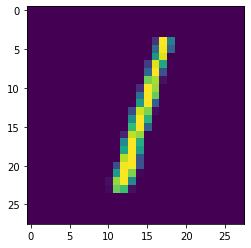

Rconstructed Image


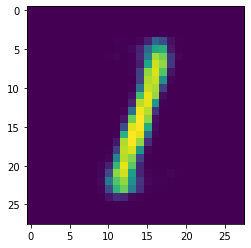

In [28]:
n= np.random.randint(100)
print('Original Image')
mplot.imshow(X_test[n])
mplot.show()
print('Rconstructed Image')
mplot.imshow(reconstructed_images[n])
mplot.show()

In [29]:
reduced_img_n = reduced_img[n]

In [30]:
reduced_img_n = reduced_img_n.reshape(5,5)

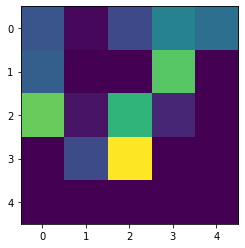

In [31]:
mplot.imshow(reduced_img_n)
mplot.show()

In [32]:
from tensorflow.keras.layers import GaussianNoise

In [33]:
sample = GaussianNoise(0.2)

In [45]:
noisey = sample(X_test[:100], training=True)

Original


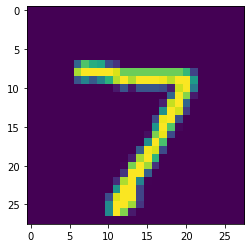

Noisy


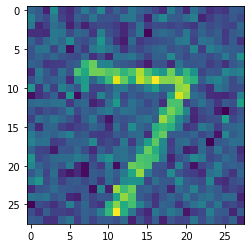

In [35]:
n= 0
print('Original')
mplot.imshow(X_test[n])
mplot.show()
print('Noisy')
mplot.imshow(noisey[n])
mplot.show()

In [36]:
tf.random.set_seed(101)
np.random.seed(101)
encoder = Sequential()
encoder.add(Flatten(input_shape=(28,28)))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [37]:
encoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_11 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 25)               

In [38]:
decoder = Sequential()
decoder.add(Dense(50, activation='relu', input_shape=(25,)))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape(target_shape=(28,28)))

In [39]:
decoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_16 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_17 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_18 (Dense)             (None, 400)               80400     
_________________________________________________________________
dense_19 (Dense)             (None, 784)               314384    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
Total params: 421,384
Trainable params: 421,384
Non-trainable params: 0
________________________________________________

In [40]:
autoencoder2 = Sequential([encoder, decoder])

In [41]:
autoencoder2.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.5), metrics=['accuracy'])

In [42]:
autoencoder2.fit(X_train, X_train, epochs=10, validation_data=(X_test,X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.2549 - accuracy: 0.7916 - val_loss: 0.2225 - val_accuracy: 0.7916
Epoch 2/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.1961 - accuracy: 0.7963 - val_loss: 0.1743 - val_accuracy: 0.7988
Epoch 3/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.1622 - accuracy: 0.8016 - val_loss: 0.1535 - val_accuracy: 0.7996
Epoch 4/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1491 - accuracy: 0.8043 - val_loss: 0.1420 - val_accuracy: 0.8040
Epoch 5/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.1405 - accuracy: 0.8061 - val_loss: 0.1353 - val_accuracy: 0.8038
Epoch 6/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.1359 - accuracy: 0.8069 - val_loss: 0.1318 - val_accuracy: 0.8047
Epoch 7/10
60000/60000 [=========================

In [43]:
clean_images = autoencoder2.predict(X_test[:100])

Original


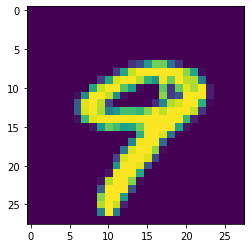

Noisy


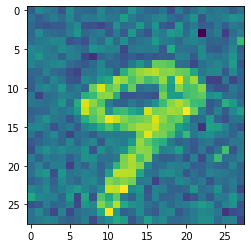

Cleaned


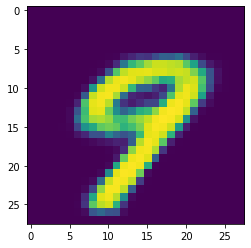

In [46]:
n= np.random.randint(100)
print('Original')
mplot.imshow(X_test[n])
mplot.show()
print('Noisy')
mplot.imshow(noisey[n])
mplot.show()
print('Cleaned')
mplot.imshow(clean_images[n])
mplot.show()